In [24]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings('ignore')

In [25]:
# reading files
vec_26= xr.open_dataset('C:/Users/USER/Desktop/Portfolio Project/Amanda/vectri_26.nc')
vec_85= xr.open_dataset('C:/Users/USER/Desktop/Portfolio Project/Amanda/vectri_85.nc')

In [26]:
vec_26

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, longitude: 23, latitude: 37)
Coordinates:
  * time       (time) datetime64[ns] 2085-01-16 ... 2085-12-16
  * longitude  (longitude) float32 356.6 356.8 357.0 357.2 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    eir        (time, latitude, longitude) float32 ...
Attributes: (12/77)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.6
    history:                Mon Jul 24 14:50:48 2023: cdo delete,timestep=3 v...
    origin:                 Adrian Tompkins, ICTP, Strada Costiera 11, Triest...
    url:                    www.ictp.it/~tompkins/vectri
    email:                  tompkins@ictp.it
    ...                     ...
    rtemperature_trend:     0.0
    rrainfall_factor:       1.0
    rmigration:             1e-05
    rhost_infect_init:      0.1
    frequency:              mon
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [27]:
vec_85

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, longitude: 23, latitude: 37)
Coordinates:
  * time       (time) datetime64[ns] 2085-01-16 ... 2085-12-16
  * longitude  (longitude) float32 356.6 356.8 357.0 357.2 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    eir        (time, latitude, longitude) float32 ...
Attributes: (12/77)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.6
    history:                Mon Jul 24 14:51:43 2023: cdo delete,timestep=3 v...
    origin:                 Adrian Tompkins, ICTP, Strada Costiera 11, Triest...
    url:                    www.ictp.it/~tompkins/vectri
    email:                  tompkins@ictp.it
    ...                     ...
    rtemperature_trend:     0.0
    rrainfall_factor:       1.0
    rmigration:             1e-05
    rhost_infect_init:      0.1
    frequency:              mon
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [28]:
# sorting longitude valuses in ascending to enable easy spatial plotting. without this you would encounter errors
vec_26=vec_26.sortby(vec_26.longitude, ascending=True)

In [29]:
vec_85=vec_85.sortby(vec_85.longitude, ascending=True)

In [30]:
# selecting the variable of interest 
V26_eir=vec_26.eir
V85_eir=vec_85.eir

In [31]:
# slicing the longitude even though not necessary since the dataset has already been sliced but just for precaution sake
v26_eir=V26_eir.sel(longitude=slice(0, 360),latitude=slice(4,11.5))
v85_eir=V85_eir.sel(longitude=slice(0, 360),latitude=slice(4,11.5))

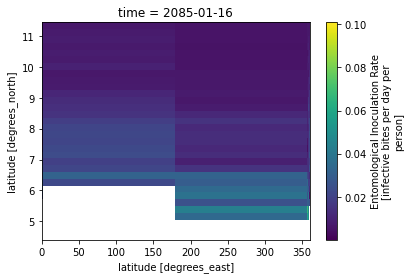

In [32]:
# visualizing one time point for all long and lat values
v26_eir[0].plot()

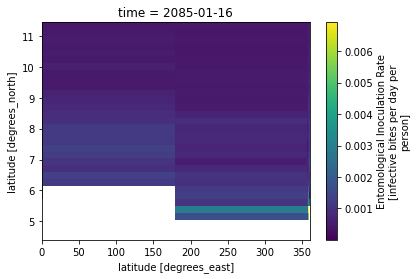

In [33]:
# visualizing one time point for all long and lat values
v85_eir[0].plot()

In [34]:
# grouping data by month and year and finding its mean 
v26_mon=v26_eir.groupby('time.month').mean('time')
v26_yr=v26_eir.groupby('time.year').mean('time')

In [35]:
# grouping data by month and year and finding its mean 
v85_mon=v26_eir.groupby('time.month').mean('time')
v85_yr=v26_eir.groupby('time.year').mean('time')

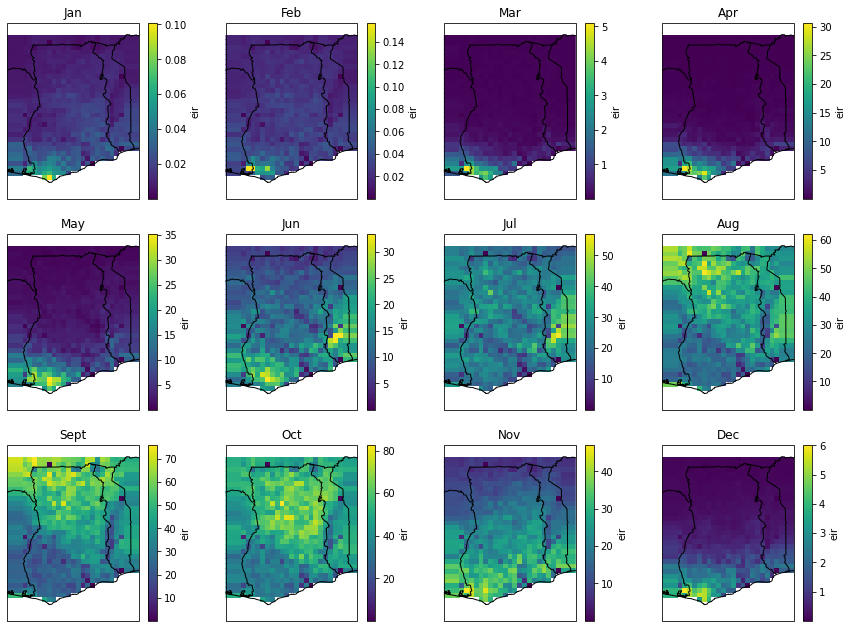

In [36]:
titles = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
          5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
          9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

count=0
fig=plt.figure(figsize=(15,11))
for mon in v26_mon.month:
    count +=1
    ax=fig.add_subplot(3,4, count,alpha=0.8, projection =ccrs.PlateCarree())
    v26_mon[v26_mon.month==mon].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    ax.set_extent([-4, 2, 4, 12]) 
    ax.title.set_text(titles.get(count))
fig.savefig('v26_mon.jpeg')

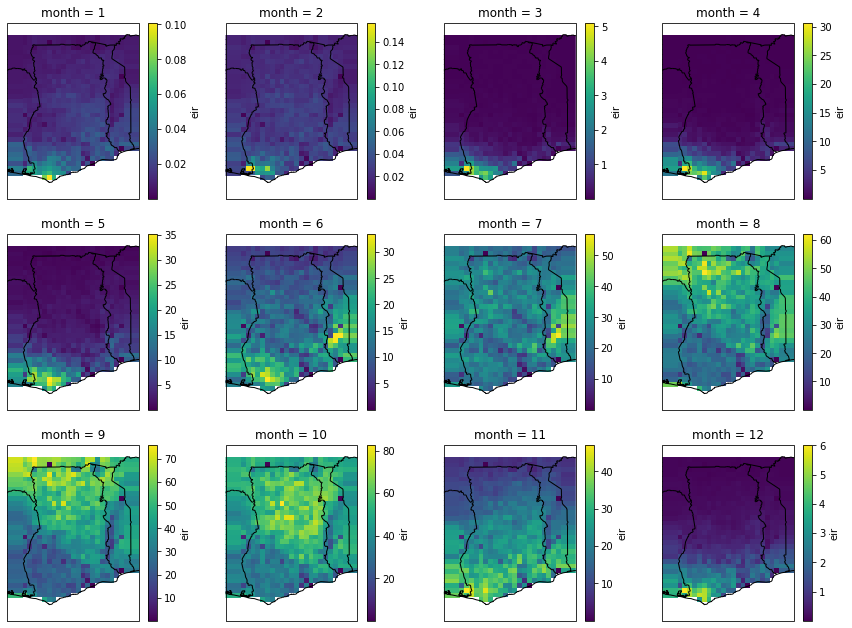

In [37]:
# plotting monthly mean for vect_26 data as a spatial plot

count=0
fig=plt.figure(figsize=(15,11))
for mon in v26_mon.month:
    count +=1
    ax=fig.add_subplot(3,4, count,alpha=0.8, projection =ccrs.PlateCarree())
    v26_mon[v26_mon.month==mon].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    ax.set_extent([-4, 2, 4, 12])

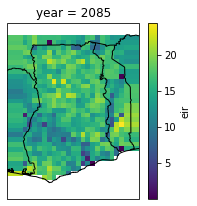

In [38]:
# plotting yearly mean for vect_26 data as a spatial plot

count=0
fig=plt.figure(figsize=(15,11))
for yr in v26_yr.year:
    count +=1
    ax=fig.add_subplot(3,4, count,alpha=0.8, projection =ccrs.PlateCarree())
    v26_yr[v26_yr.year==yr].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    ax.set_extent([-4, 2, 4, 12])

# plotting monthly mean for vect_85 data as a spatial plot

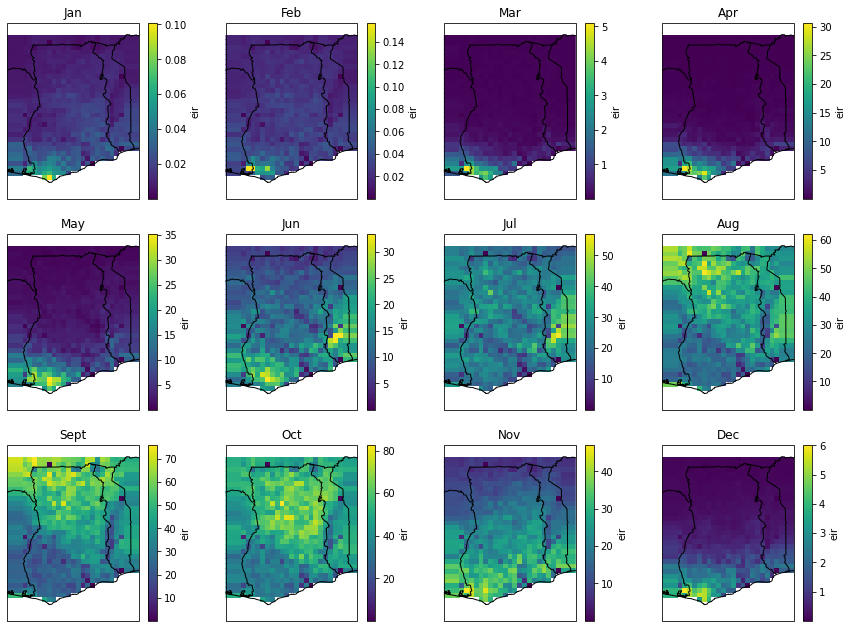

In [39]:
# plotting monthly mean for vect_85 data as a spatial plot with their names
titles = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
          5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
          9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

count=0
fig=plt.figure(figsize=(15,11))
for mon in v85_mon.month:
    count +=1
    ax=fig.add_subplot(3,4, count,alpha=0.8, projection =ccrs.PlateCarree())
    v85_mon[v85_mon.month==mon].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    ax.set_extent([-4, 2, 4, 12]) 
    ax.title.set_text(titles.get(count))
fig.savefig('v85_mon.jpeg')

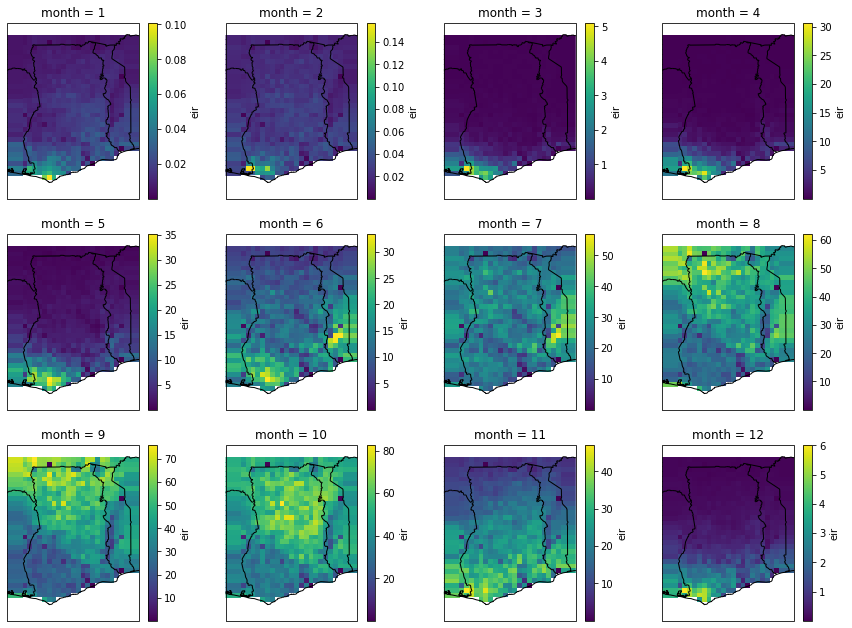

In [40]:
# plotting monthly mean for vect_85 data as a spatial plot

count=0
fig=plt.figure(figsize=(15,11))
for mon in v85_mon.month:
    count +=1
    ax=fig.add_subplot(3,4, count,alpha=0.8, projection =ccrs.PlateCarree())
    v26_mon[v26_mon.month==mon].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    ax.set_extent([-4, 2, 4, 12])

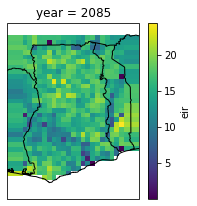

In [41]:
# plotting yearly mean for vect_85 data as a spatial plot

count=0
fig=plt.figure(figsize=(15,11))
for yr in v85_yr.year:
    count +=1
    ax=fig.add_subplot(3,4, count,alpha=0.8, projection =ccrs.PlateCarree())
    v26_yr[v26_yr.year==yr].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    ax.set_extent([-4, 2, 4, 12])

In [42]:
V26_eir_re = V26_eir.assign_coords(longitude=((360 + (V26_eir.longitude % 360)) % 360))
V26_eir_re = V26_eir_re.roll(longitude=int(len(V26_eir_re['longitude']) / 2),roll_coords=True)

In [43]:
V26_eir_re

<xarray.DataArray 'eir' (time: 12, latitude: 37, longitude: 23)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [8.06726441e-02, 1.00833930e-01, 6.39319941e-02, ...,
                    nan,            nan,            nan],
        ...,
        [4.43825545e-03, 4.19579912e-03, 4.58801771e-03, ...,
         5.56567218e-03, 5.74909430e-03, 7.70505285e-03],
        [3.74459266e-03, 2.26677349e-03, 1.03653655e-07, ...,
         5.25363581e-03, 5.27408998e-03, 4.88617411e-03],
        [3.34159308e-03, 4.60800296e-03, 3.25807766e-03, ...,
         5.37091540e-03, 5.05127851e-03, 5.34493290e-03]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [3.54461670e-02, 4.81677465e-02, 4.47576605e-02, ...,
                    nan,            nan,            nan],
...
        [3.90309525e+00, 4.67492294e+00, 4.93289137e+00, ...,
         6.43825483e+00, 6.02415323e+00, 5.22918081e+00],
        [2.50954199e+00, 2.40099502e+00, 5.71141194e-04, ...,
         5.04035854e+00, 5.23582745e+00, 4.19027853e+00],
        [2.88304710e+00, 3.77208018e+00, 3.41139579e+00, ...,
         4.09083414e+00, 4.07274818e+00, 4.20634508e+00]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [3.17705369e+00, 5.33271837e+00, 3.89882779e+00, ...,
                    nan,            nan,            nan],
        ...,
        [3.62266302e-02, 5.04691973e-02, 5.26237078e-02, ...,
         9.44770575e-02, 9.03253183e-02, 5.69781959e-02],
        [3.51607651e-02, 2.64569093e-02, 6.58617773e-06, ...,
         9.77735668e-02, 8.72222111e-02, 6.90590665e-02],
        [4.04465497e-02, 4.65902686e-02, 3.86916958e-02, ...,
         7.90842995e-02, 6.07416034e-02, 5.62667139e-02]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2085-01-16 ... 2085-12-16
  * longitude  (longitude) float32 357.7 357.9 358.1 358.3 ... 357.0 357.2 357.5
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
Attributes:
    long_name:     Entomological Inoculation Rate
    units:         infective bites per day per person
    cell_methods:  time: sum

# Time series plot

In [44]:
# grouping data by month and year and finding its mean 
# apparently your data has just one year so no need for yearly time series plot

v26_mon_mean=v26_mon.mean(dim=('longitude','latitude'))
# v26_ann_mean=v26_yr.mean(dim=('longitude','latitude'))

In [45]:
# grouping data by month and year and finding its mean 
# apparently your data has just one year so no need for yearly time series plot

v85_mon_mean=v85_mon.mean(dim=('longitude','latitude'))
# v85_ann_mean=v85_yr.mean(dim=('longitude','latitude'))

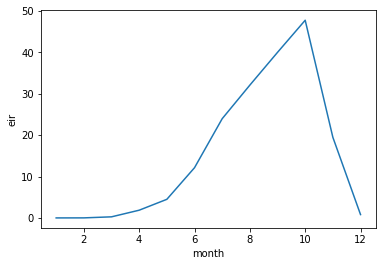

In [46]:
# plotting monthly mean for vect_26 data as a timeseries plot

v26_mon_mean.plot()
# plt.xlabel('Months', fontsize=14)
# plt.ylabel('label name', fontsize=14)
# plt.title('title', fontsize= 20)
# plt.savefig('file name.jpeg')